## Role of activation function
Even though our neural network has a very complex configuration of weights, it will not be able to solve a problem without the activation function. The reason for this lies in the concept of **Non-Linearity**.

Let’s revise what linearity and non-linearity means.

$$ y = w_1 * x_1 + w_2 * x_2 $$

The above equation represents a **linear relationship** between $y$ and $x_1$, $x_2$. Regardless of what values $w_1$ and $w_2$ have, at the end of the day the change of value of $x_1$ and $x_2$ will result in a linear change in $y$. Now if we look at real world data we realize this is actually not desirable because data often has non-linear relationships between the input and output variables.


<center><img src="img/activation_function_1.png" alt="Linearity vs non-linearity" width="500" height="409" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 9.</b> Linear relationship vs non-linear relationship</i></p>

The above diagram represents a typical dataset which shows a non-linear relationship between $x$ and $y$. If we try to fit a linear relationship on the data, we will end up with the **red line**, which is not a very accurate representation of the data. However if our relationship can be **non-linear**, we are able to get the green line, which is much better.

Now let’s compare the neural network equation **with and without the activation function**.

Without activation:
$$y = \sum_{i=0}^{n}(w_i * x_i) + b $$

With activation:
$$ y = f(\sum_{i=0}^{n}(w_i * x_i) + b) $$

We can observe that in this equation, there exists a **linear relationship** between the input and the output. However in the case of the equation with activation function, we can say that the relationship between input and output can be non-linear, IF the activation function itself is **non-linear**.

Hence all we have to do is keep some non-linear function as the activation function for each neuron and our neural network is now capable of fitting on non-linear data.

Let’s look at a couple of popular activation functions:


<center><img src="img/activation_function_2.png" alt="ReLU vs Sigmoid" width="500" height="283" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 10.</b> ReLU vs Sigmoid activation functions  </i></p>

## ReLU
ReLU stands for **Rectified Linear Unit**. It essentially becomes an identity function ($y = x$) when $x \geq 0$ and becomes $0$ when $x \lt 0$. This is a very widely used activation function because its a non-linear function and it is very simple.

## Sigmoid
Sigmoid is essentially a function bounded between $0$ and $1$. It will become $0$ for values which are very negative and $1$ for values which are very positive. Hence this function squishes values which are very high or very low to values between $0$ and $1$. This is useful in neural networks sometimes to ensure values aren’t extremely high or low. This function is usually used at the last layer when we need values which are binary ($0$ or $1$).

$$y=\frac{1}{1+e^{-x}}$$

## Tanh
Tanh function (hyperbolic tangent function), is a shifted version of the sigmoid, allowing it to stretch across the y-axis. It is defined as:
$$y=tanh(x) = \frac{2}{1+e^{-2x}}-1$$

Alternatively, it can be expressed using the sigmoid function:
$$y=tanh(x) = 2 \times sigmoid(2x) -1$$

**Tanh** outputs values from $-1$ to $+1$. It is commonly used in hidden layers due to its zero-centered output, facilitating easier learning for subsequent layers.

## Softmax
Softmax is an activation function commonly used in neural networks for multi-classification problems. Softmax is ideal for problems involving **more than two classes**, where the goal is to predict a single class out of many. The function's ability to generate a **probability distribution** over classes makes it particularly useful in classification models.

$$y=softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}}$$

## Non-linearity importance in NN

Neural networks consist of neurons that operate using **weights**, **biases**, and **activation functions**.

In the learning process, these weights and biases are updated based on the error produced at the output - a process known as **backpropagation**. Activation functions enable backpropagation by providing gradients that are essential for updating the weights and biases.

Without non-linearity, even deep networks would be limited to solving **only simple, linearly separable problems**. Activation functions empower neural networks to model highly complex data distributions and solve advanced deep learning tasks. Adding non-linear activation functions introduce flexibility and enable the network to learn more complex and abstract patterns from data.

## Implementation
Here comes some examplar implementations of the most common activation functions.

In [1]:
import numpy as np
    
def relu(x: float) -> float:
    """ReLU activation function"""
    return np.maximum(0, x)

def sigmoid(x: float) -> float:
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def tanh(x: float) -> float:
    """Tanh activation function"""
    return 2 * sigmoid(2*x) - 1

def softmax(x: float) -> float:
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

Let's see how **Sigmoid** and **Tanh** are related.

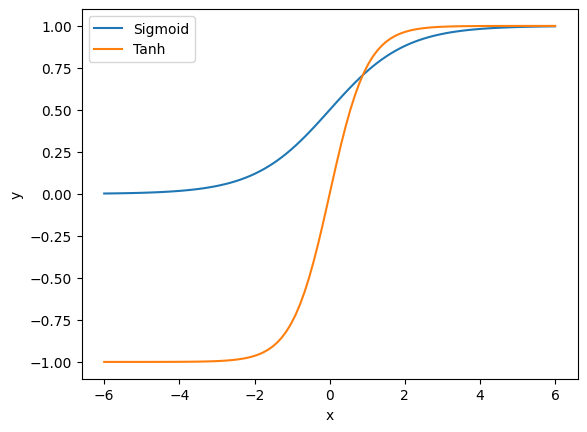

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-6, 6, 100)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

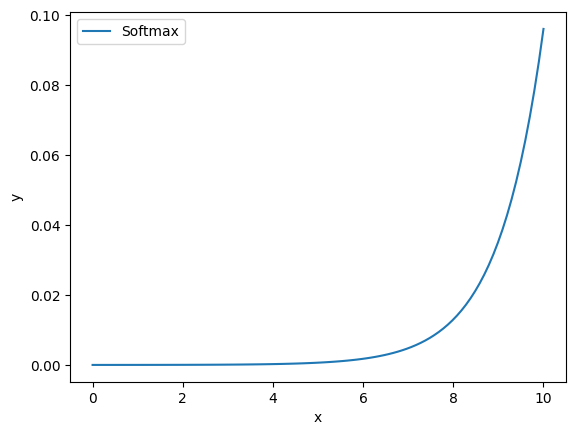

In [3]:
x = np.linspace(0, 10, 100)
plt.plot(x, softmax(x), label='Softmax')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Error Calculation Methods

Error is a very important part of a neural network because it allows us to estimate how poorly the model is performing and accordingly we can update our weights to improve performance. Now let’s go through how exactly error can be calculated in neural networks. The type of error calculation method we choose will depend upon the type of task we are trying to do. There are mainly two types of tasks a typical neural network can do:

1. Regression
2. Classification

**Regression** is when our output variable is **continuous** in nature. When $y$ is a numerical variable which we have to predict, the task is called regression. Examples include trying to predict house prices or trying to predict how many marks someone will score in an exam.

**Classification** is when our output variable is **discrete** in nature. When $y$ is trying to represent a certain class out of a defined number of classes, the task is called classification. Examples include trying to predict between a cat and a dog, or trying to predict whether an email is spam or not.


<center><img src="img/backprop_5.png" alt="Regression vs Classification" width="582" height="293" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 11.</b> Regression-friendly vs Classification-friendly data</i></p>

Here, we have to understand that in the regression graph the output variable is a continuous value just like $x$. In the classification graph, there are 2 input variables ($x_1$ and $x_2$) and the output is represented by the color of the points. Eg: $y = 0$ for RED and $y = 1$ for GREEN.

Let’s first cover regression.

### Regression 
For regression, the error function we use is **Mean Squared Error**. We are simply trying to find the difference between the actual value and predicted value, and square it. The formula for the same is given below:

$$ Е = \frac{1}{m} \times \sum_{i=1}^{m} (Y_{pred}-Y)^2 $$

Here, $E$ is the error of the model. $Y_{pred}$ is the output of the model for the data and $Y$ is the actual output which we are supposed to get. We square this so that negative and positive differences both become positive in the end. $m$ represents the number of data rows we input into the model. We are essentially calculating error of all points and averaging them. As we train the model we hope to achieve a very **low MSE** so that we know that our neural network is predicting values which are close to the actual values.

Moving on to classification.

### Classification
In classification the way we represent data is completely different. Because we are dealing with multiple classes which may not be in a numerical format, we have to convert them into a numerical format so that the neural network can process them. We typically convert them using the method called **one hot encoding**.

#### One Hot encoding
**One Hot Encoding** (known also as **one-hot vector**) is a method for converting categorical variables into a **binary format**. It creates new columns for each category where $1$ means the category is present and $0$ means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.

##### Example
To grasp the concept better let's explore a simple example. Imagine we have a dataset with fruits their categorical values and corresponding prices. Using one-hot encoding we can transform these categorical values into numerical form. For example:
* Wherever the fruit is "Apple," the Apple column will have a value of $1$ while the other fruit columns (like Mango or Orange) will contain $0$.
* This pattern ensures that each categorical value gets its own column represented with binary values ($1$ or $0$) making it usable for machine learning models.

| Fruit | Categorical value | Price |
| --- | --- | --- |
| apple | 1 | 5 |
| mango | 2 | 10 |
| apple | 1 | 15 |
| orange | 3 | 20 |
| apple | 1 | 15 |

The output after applying one-hot encoding on the data is given as follows:
| Apple | Mango | Orange| Price |
| --- | --- | --- | --- |
| 1 | 0 | 0 | 5 |
| 0 | 1 | 0 | 10 |
| 1 | 0 | 0 | 15 |
| 0 | 0 | 1 | 20 |
| 1 | 0 | 0 | 15 |

### Regression 
For regression, the error function we use is **Mean Squared Error**. We are simply trying to find the difference between the actual value and predicted value, and square it. The formula for the same is given below:

$$ Е = \frac{1}{m} \times \sum_{i=1}^{m} (Y_{pred}-Y)^2 $$

Here, $E$ is the error of the model. $Y_{pred}$ is the output of the model for the data and $Y$ is the actual output which we are supposed to get. We square this so that negative and positive differences both become positive in the end. $m$ represents the number of data rows we input into the model. We are essentially calculating error of all points and averaging them. As we train the model we hope to achieve a very **low MSE** so that we know that our neural network is predicting values which are close to the actual values.

Moving on to classification.

### Classification
In classification the way we represent data is completely different. Because we are dealing with multiple classes which may not be in a numerical format, we have to convert them into a numerical format so that the neural network can process them. We typically convert them using the method called **one hot encoding**.

#### One Hot encoding
**One Hot Encoding** (known also as **one-hot vector**) is a method for converting categorical variables into a **binary format**. It creates new columns for each category where $1$ means the category is present and $0$ means it is not. The primary purpose of One Hot Encoding is to ensure that categorical data can be effectively used in machine learning models.

##### Example
To grasp the concept better let's explore a simple example. Imagine we have a dataset with fruits their categorical values and corresponding prices. Using one-hot encoding we can transform these categorical values into numerical form. For example:
* Wherever the fruit is "Apple," the Apple column will have a value of $1$ while the other fruit columns (like Mango or Orange) will contain $0$.
* This pattern ensures that each categorical value gets its own column represented with binary values ($1$ or $0$) making it usable for machine learning models.

| Fruit | Categorical value | Price |
| --- | --- | --- |
| apple | 1 | 5 |
| mango | 2 | 10 |
| apple | 1 | 15 |
| orange | 3 | 20 |
| apple | 1 | 15 |

The output after applying one-hot encoding on the data is given as follows:
| Apple | Mango | Orange| Price |
| --- | --- | --- | --- |
| 1 | 0 | 0 | 5 |
| 0 | 1 | 0 | 10 |
| 1 | 0 | 0 | 15 |
| 0 | 0 | 1 | 20 |
| 1 | 0 | 0 | 15 |


Let’s take another example of having three cities as classes and we have to predict between them. San Francisco, New York and Boston. We will then have an array of size 3 representing Y for each row of data. It is done in the following way:


<center><img src="img/backprop_6.png" alt="One-hot encoding" width="474" height="222" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 12.</b> One-hot encoding</i></p>

The array size will indicate the total number of classes and the position of 1 in the array will represent the class.


### Softmax
Before we calculate the error in this scenario. We also have to ensure that the last layer of the neural network has a number of neurons equal to the number of classes. The last layer of the neural network should also be having the activation function of **softmax**. This activation function essentially converts the last layer into a **probability distribution**. Hence the sum of all the values of the nodes in the last layer will be **equal to 1**.

*(Note: If there are only two classes, then we can use just one node and use Sigmoid instead of Softmax)*


<center><img src="img/backprop_7.png" alt="Softmax activation function" width="363" height="212" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 13.</b> With `softmax` the sum of all the nodes in the last layer is 1.</i></p>

Now that it’s a probability distribution and all the values are between $1$ and $0$, we can proceed to calculate the error. The error we use here is called **Log Loss**, or **Categorical Cross Entropy**. What this function basically does is to compare each element of $Y_{pred}$ and $Y$ and see how far apart they are. Then we average this value across all elements.

From the classification perspective, when we predict $0$ at a particular element but the actual value is $1$, or when we predict $1$ and the actual value is $0$, that means our model is performing extremely bad and we have to have a huge error in this case. This is the main concept of this error function.


<center><img src="img/backprop_8.png" alt="One-hot encoding" width="488" height="317" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 14.</b> Poor model accuracy means that internal weights must be majorly changed.</i></p>

Having this kind of a error function forces the neural network to understand where it is going wrong **much quicker** and hence allows it to learn from the data **much faster**. 